In [1]:
import os
from matplotlib import image, pyplot
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import pickle
from matplotlib.colors import hsv_to_rgb

In [3]:
directory = 'all_data/train/'
dir_test = 'all_data/test/'

In [57]:
dir_test = 'all_data/test/'

In [5]:
lower_green = np.array([36, 25, 25])
upper_green = np.array([80,255,255])

In [4]:
pic_xs = {}
pic_xhsv = {}
pic_xlab = {}

In [63]:
pic_xlab = {}

In [5]:
import cv2 as cv
import sys

In [6]:
from matplotlib import pyplot as plt

In [6]:
img = cv.imread('all_data/train/Black-grass/0ace21089.png')

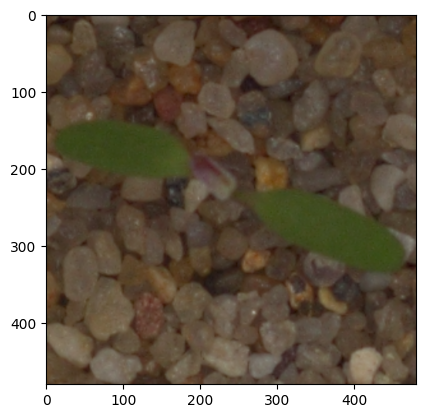

In [44]:
plt.imshow(pic_xs['Fat Hen'][15])

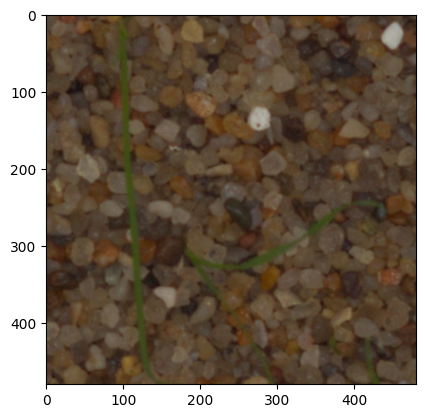

In [92]:
#plt.imshow(cv.cvtColor(pic_xs['Loose Silky-bent'][1], cv.COLOR_RGB2HSV))
plt.imshow(pic_xs['Loose Silky-bent'][1])

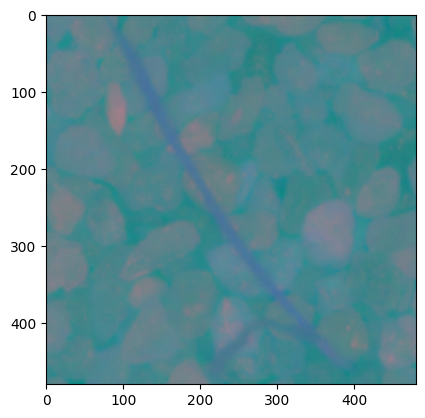

In [207]:
#image = cv.cvtColor(pic_x[0], cv.COLOR_BGR2RGB)
plt.imshow(pic_xlab['Loose Silky-bent'][15])

In [11]:
a_channel = pic_xlab['Loose Silky-bent'][15][:,:,1]

In [12]:
th = cv.threshold(a_channel,125,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)[1]

In [144]:
th = cv.threshold(a_channel,150,255,cv.THRESH_BINARY_INV)[1]

In [13]:
masked = cv.bitwise_and( pic_xlab['Loose Silky-bent'][15],  pic_xlab['Loose Silky-bent'][15], mask = th)

In [16]:
pic2 = cv.cvtColor(masked, cv.COLOR_LAB2RGB)

error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [10]:
#lab format   a - red & green,  b- yellow and blue
for filedir in os.listdir(directory):
    f = os.path.join(directory, filedir)
    for filename in os.listdir(f):
        #print(directory+filedir+'/'+filename)
        pic = cv.imread(directory+filedir+'/'+filename)  # mb dir with linux command
        pic1 = cv.resize(pic, (480,480))
        pic2 = cv.cvtColor(pic1, cv.COLOR_BGR2LAB)
        a_channel = pic2[:,:,1]
        th = cv.threshold(a_channel,125,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)[1]
        masked = cv.bitwise_and(pic_xlab['Loose Silky-bent'][15],  pic_xlab['Loose Silky-bent'][15], mask = th)
        append_value(pic_xlab, filedir, th)
        #pic_y.append(filedir) # maybe hstack or vstack

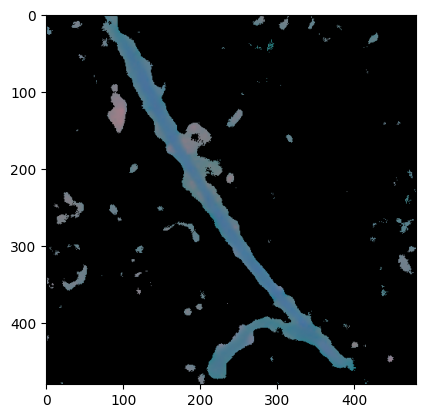

In [14]:
plt.imshow(masked)

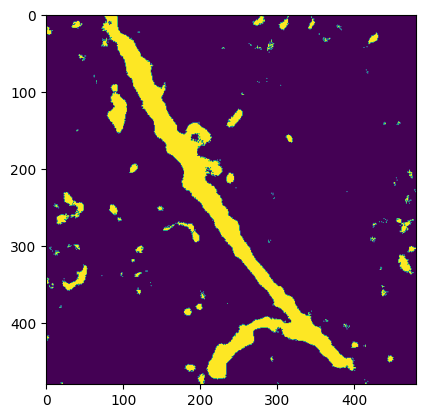

In [206]:
plt.imshow(th)

In [77]:
mask = cv.inRange((pic_xhsv['Loose Silky-bent'][0]), lower_green, upper_green)

KeyError: 'Loose Silky-bent'

In [47]:
np.max(mask)

255

In [39]:
pic_xhsv['Loose Silky-bent'][1].shape

(480, 480, 3)

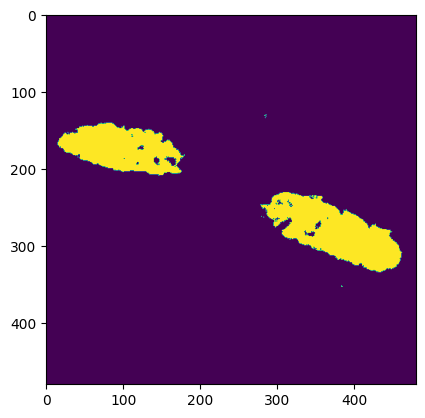

In [43]:
plt.imshow(mask
           #, cmap='gray'
          )

In [33]:
plt.imshow(hsv_to_rgb(mask))

ValueError: Last dimension of input array must be 3; shape (480, 480) was found.

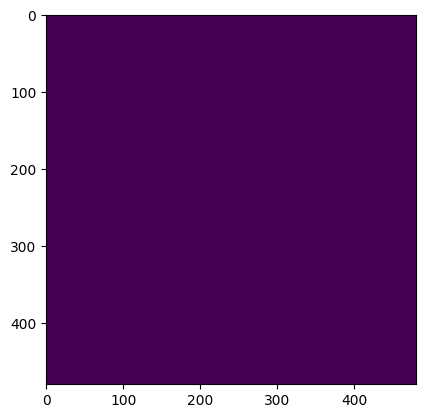

In [25]:
plt.imshow(mask)

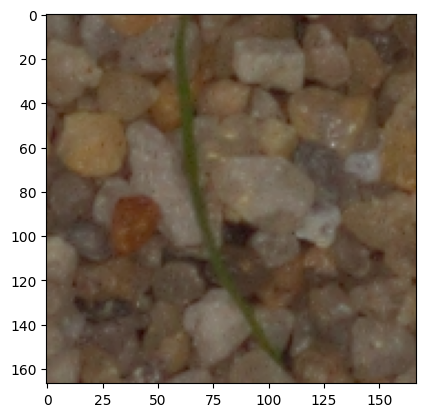

In [37]:
image = cv.cvtColor(pic_x[0], cv.COLOR_BGR2RGB)
plt.imshow(image)

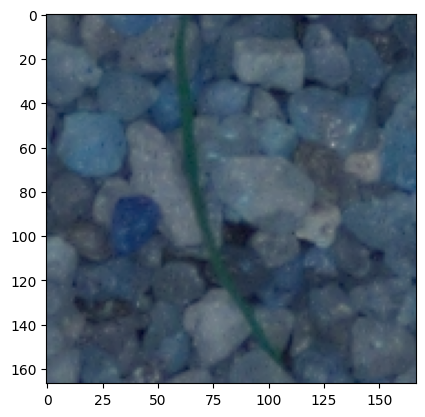

In [38]:
plt.imshow(pic_x[0])

In [6]:
img.shape

(1899, 1900, 3)

In [9]:
def append_value(dict_obj, key, value):
    # Check if key exist in dict or not
    if key in dict_obj:
        # Key exist in dict.
        # Check if type of value of key is list or not
        if not isinstance(dict_obj[key], list):
            # If type is not list then make it list
            dict_obj[key] = [dict_obj[key]]
        # Append the value in list
        dict_obj[key].append(value)
    else:
        # As key is not in dict,
        # so, add key-value pair
        dict_obj[key] = value

In [10]:
#need to make a function for it when refactor
#rgb format
for filedir in os.listdir(directory):
    f = os.path.join(directory, filedir)
    for filename in os.listdir(f):
        #print(directory+filedir+'/'+filename)
        pic = cv.imread(directory+filedir+'/'+filename)  # mb dir with linux command
        pic1 = cv.resize(pic, (360,360))
        pic2 = cv.cvtColor(pic1, cv.COLOR_BGR2RGB)
        append_value(pic_xs, filedir, pic2)
        #pic_y.append(filedir) # maybe hstack or vstack

In [10]:
# hsv format
for filedir in os.listdir(directory):
    f = os.path.join(directory, filedir)
    for filename in os.listdir(f):
        #print(directory+filedir+'/'+filename)
        pic = cv.imread(directory+filedir+'/'+filename)  # mb dir with linux command
        pic1 = cv.resize(pic, (480,480))
        pic2 = cv.cvtColor(pic1, cv.COLOR_BGR2HSV)
        append_value(pic_xhsv, filedir, pic2)

In [10]:
#lab format   a - red & green,  b- yellow and blue
for filedir in os.listdir(directory):
    f = os.path.join(directory, filedir)
    for filename in os.listdir(f):
        #print(directory+filedir+'/'+filename)
        pic = cv.imread(directory+filedir+'/'+filename)  # mb dir with linux command
        pic1 = cv.resize(pic, (480,480))
        pic2 = cv.cvtColor(pic1, cv.COLOR_BGR2LAB)
        append_value(pic_xlab, filedir, pic2)
        #pic_y.append(filedir) # maybe hstack or vstack

In [11]:
len(pic_xs['Loose Silky-bent'])

654

In [13]:
np.max(pic_xs['Loose Silky-bent'][0]/255)

0.6784313725490196

In [65]:
len(pic_xlab['Loose Silky-bent'])

654

In [13]:
np.stack(pic_xs['Loose Silky-bent'])

array([[[[113, 101,  89],
         [113, 101,  89],
         [113, 101,  88],
         ...,
         [ 84,  66,  47],
         [ 84,  65,  47],
         [ 84,  65,  47]],

        [[113, 101,  89],
         [113, 101,  89],
         [113, 101,  88],
         ...,
         [ 84,  66,  47],
         [ 84,  65,  47],
         [ 84,  65,  47]],

        [[112, 100,  88],
         [112, 100,  88],
         [112, 100,  88],
         ...,
         [ 85,  67,  48],
         [ 85,  66,  48],
         [ 85,  66,  48]],

        ...,

        [[117,  99,  85],
         [117,  99,  85],
         [117,  99,  84],
         ...,
         [114,  98,  82],
         [114,  97,  81],
         [114,  97,  81]],

        [[116,  98,  83],
         [116,  98,  83],
         [116,  98,  83],
         ...,
         [114,  97,  82],
         [114,  97,  82],
         [114,  97,  82]],

        [[116,  98,  83],
         [116,  98,  83],
         [116,  98,  83],
         ...,
         [114,  97,  82],
        

In [12]:
a = [key for key in pic_xs.keys() for lst in range(len(pic_xs[key]))]

In [62]:
b.value_counts()

grass                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

Text(0.5, 1.0, 'The structure of classes')

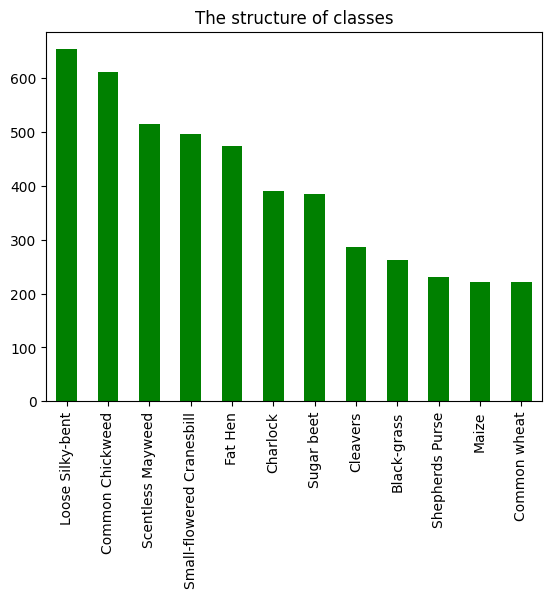

In [56]:
pd.Series(a).value_counts(sort=True).plot(kind='bar', color='green').set_title('The structure of classes')

In [13]:
a= [i for i in pic_xs.keys()]

In [14]:
a

['Loose Silky-bent',
 'Charlock',
 'Small-flowered Cranesbill',
 'Cleavers',
 'Sugar beet',
 'Maize',
 'Common wheat',
 'Black-grass',
 'Shepherds Purse',
 'Fat Hen',
 'Scentless Mayweed',
 'Common Chickweed']

<AxesSubplot: title={'center': 'Pixels distribution'}, ylabel='Frequency'>

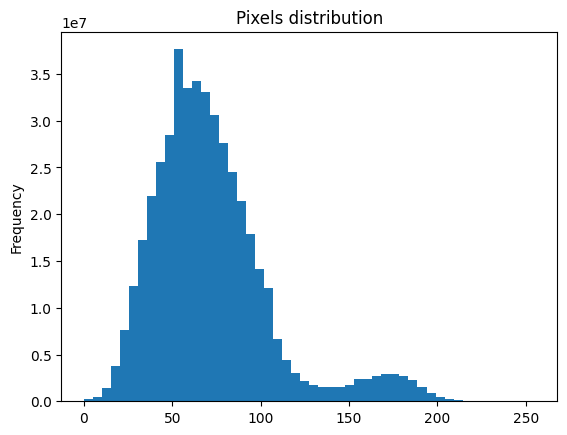

In [15]:
pd.Series(np.array(pic_xs['Loose Silky-bent']).flatten()).plot(kind='hist', bins=50, title='Pixels distribution')

In [71]:
pic_xs[a[0]].flatten()

array([99, 88, 79, ..., 71, 55, 38], dtype=uint8)

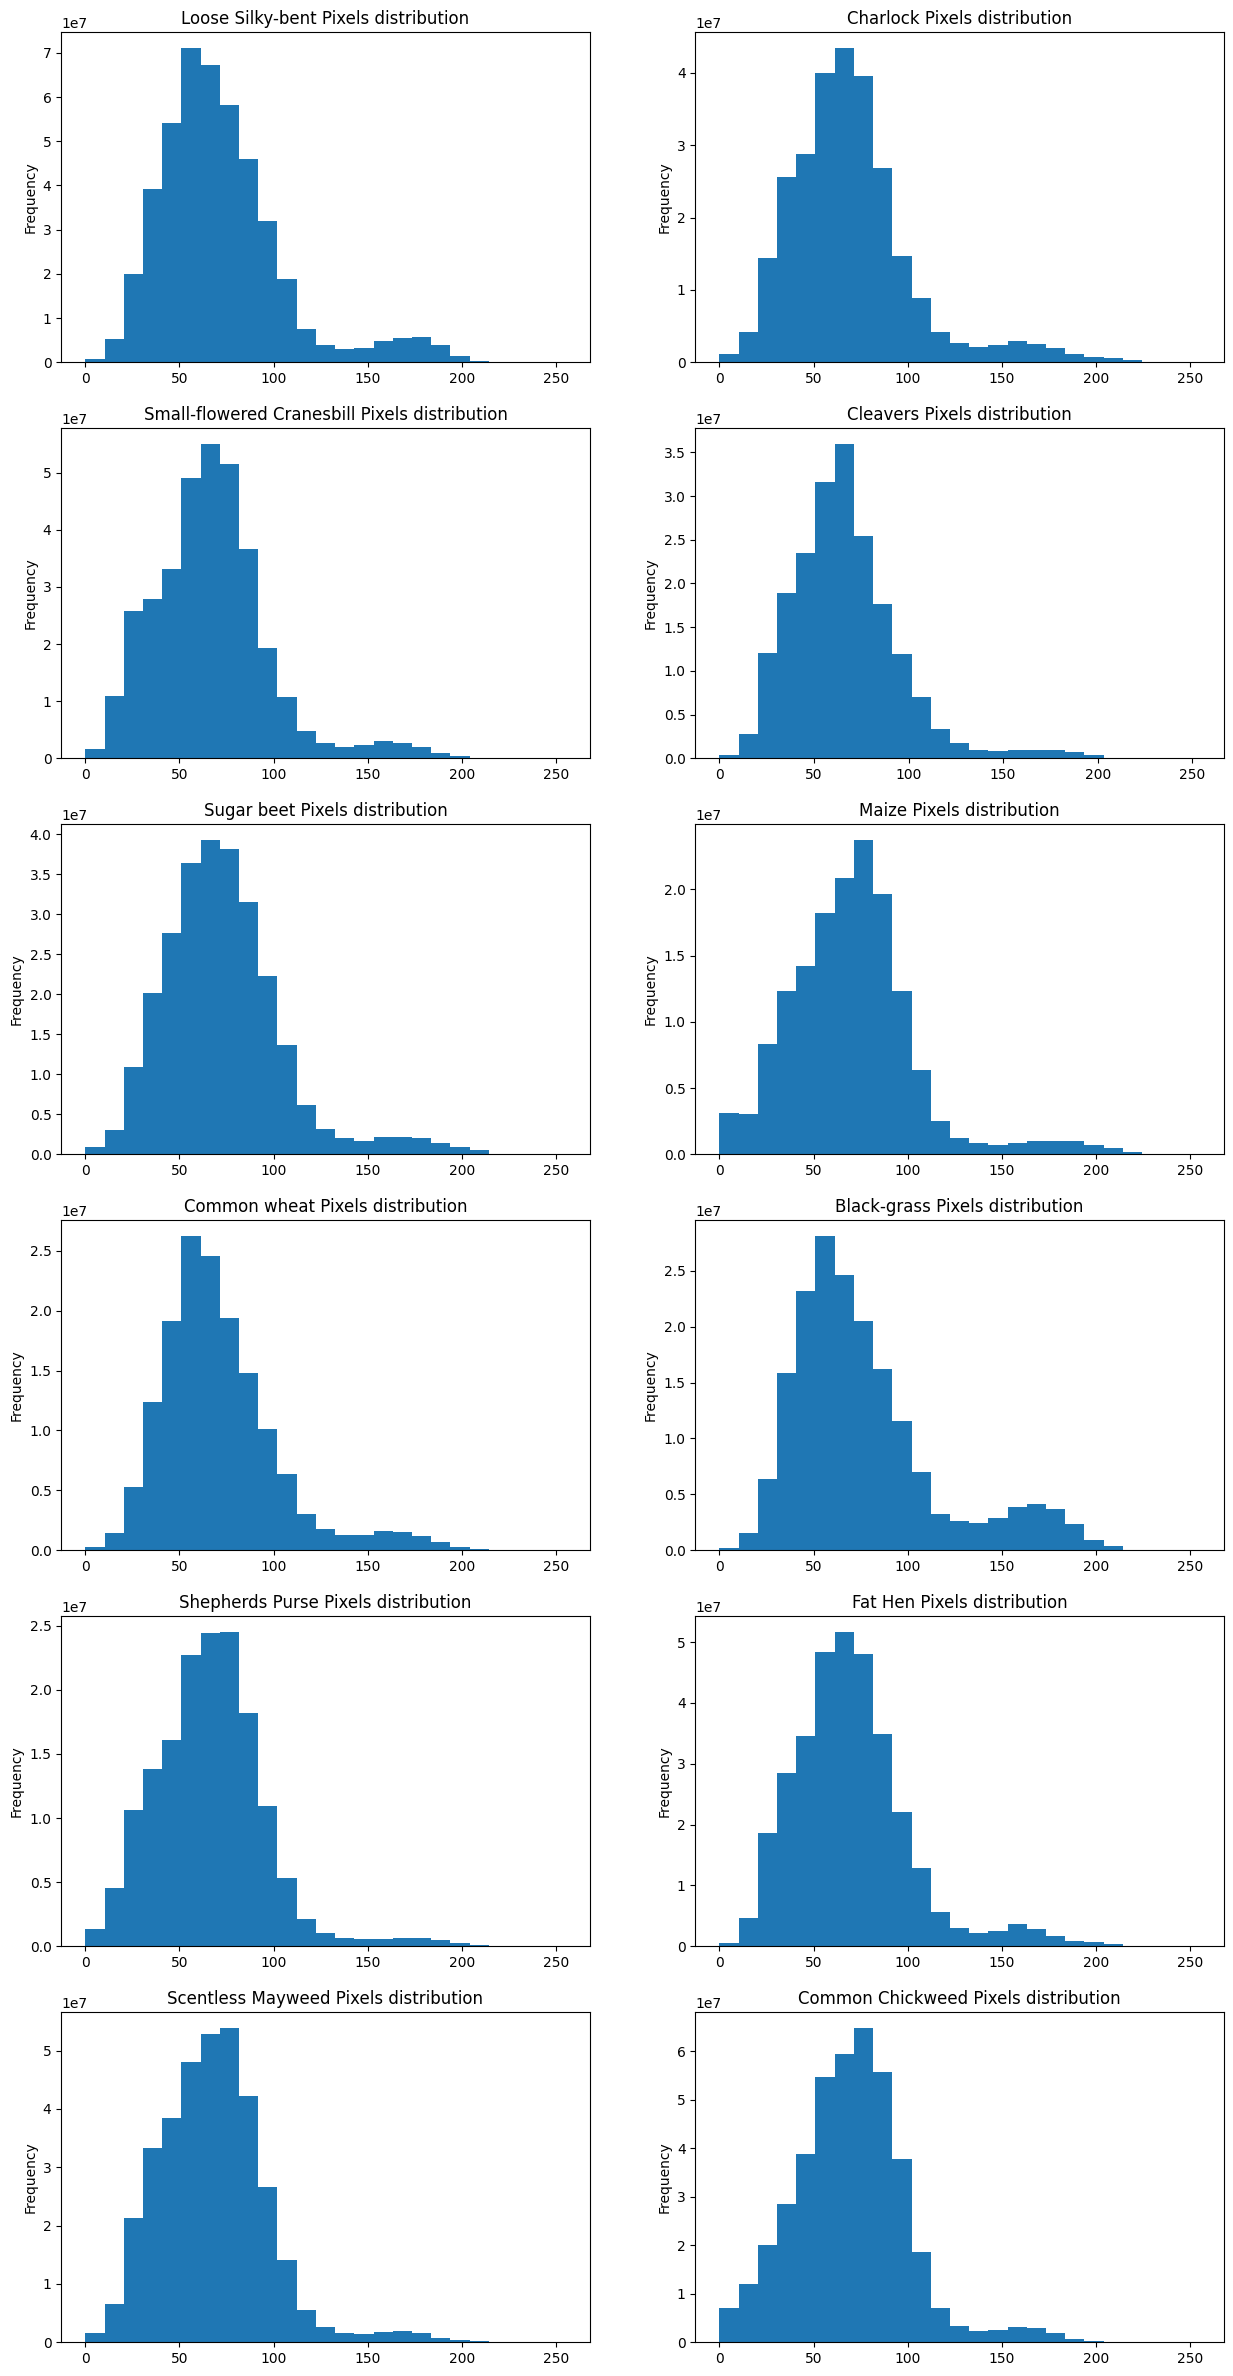

In [12]:
fig, axs = plt.subplots(6, 2, figsize=(15,30))
for c, (k,v) in enumerate(pic_xs.items()):
    pd.Series(np.array(pic_xs[k]).flatten()).plot(kind='hist', bins=25, title=f'{k} Pixels distribution', ax=axs[c//2, c%2])


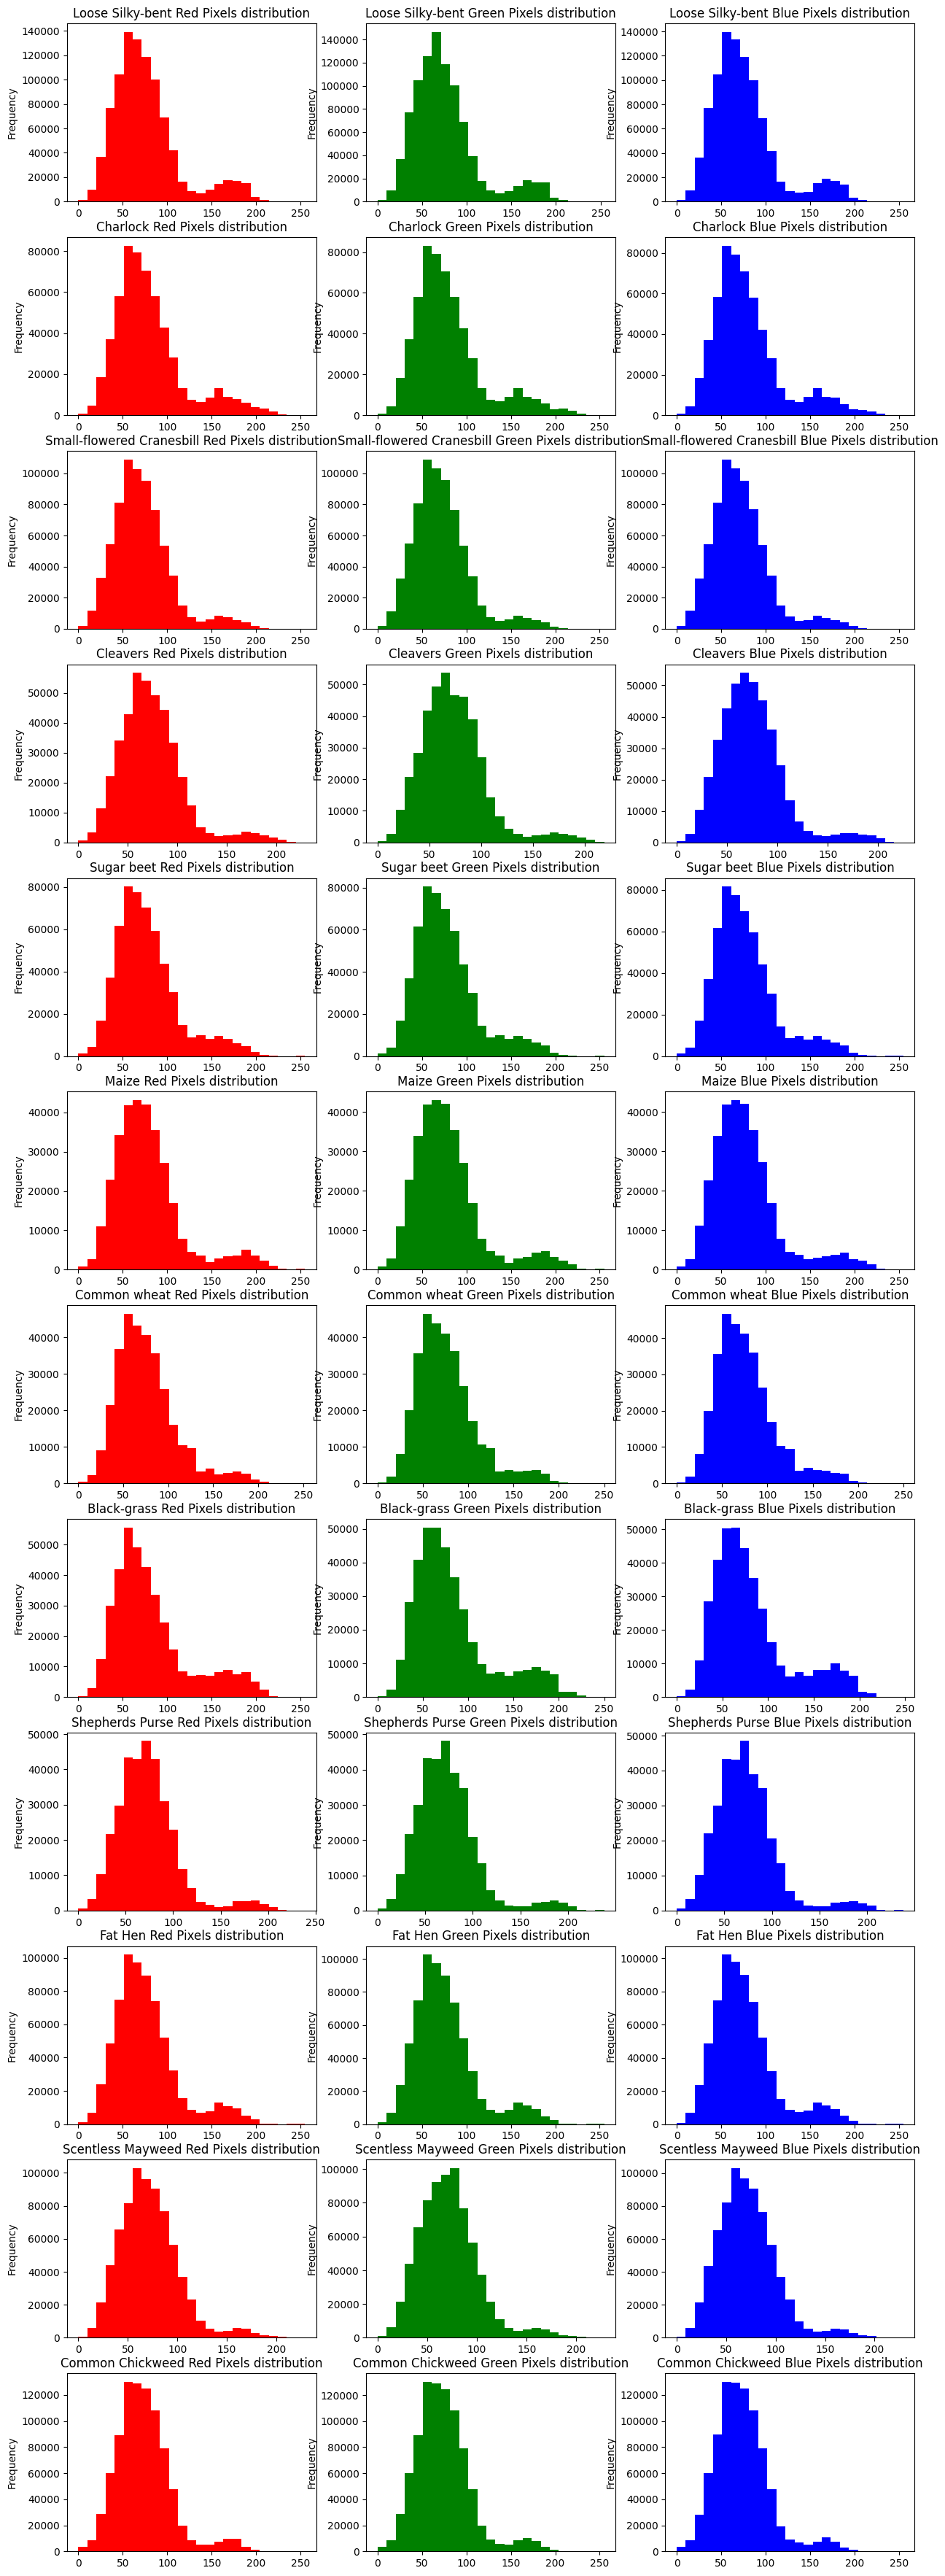

In [15]:
fig, axs = plt.subplots(12, 3, figsize=(15,45))
for c, (k,v) in enumerate(pic_xs.items()):
    pd.Series(np.array(pic_xs[k])[:, :, 0].flatten()).plot(kind='hist',
                                                  bins=25, title=f'{k} Red Pixels distribution', ax=axs[c, 0], color='red')
    pd.Series(np.array(pic_xs[k])[:, :, 1].flatten()).plot(kind='hist',
                                                  bins=25, title=f'{k} Green Pixels distribution', ax=axs[c, 1], color='green')
    pd.Series(np.array(pic_xs[k])[:, :, 2].flatten()).plot(kind='hist',
                                                  bins=25, title=f'{k} Blue Pixels distribution', ax=axs[c, 2], color='blue')

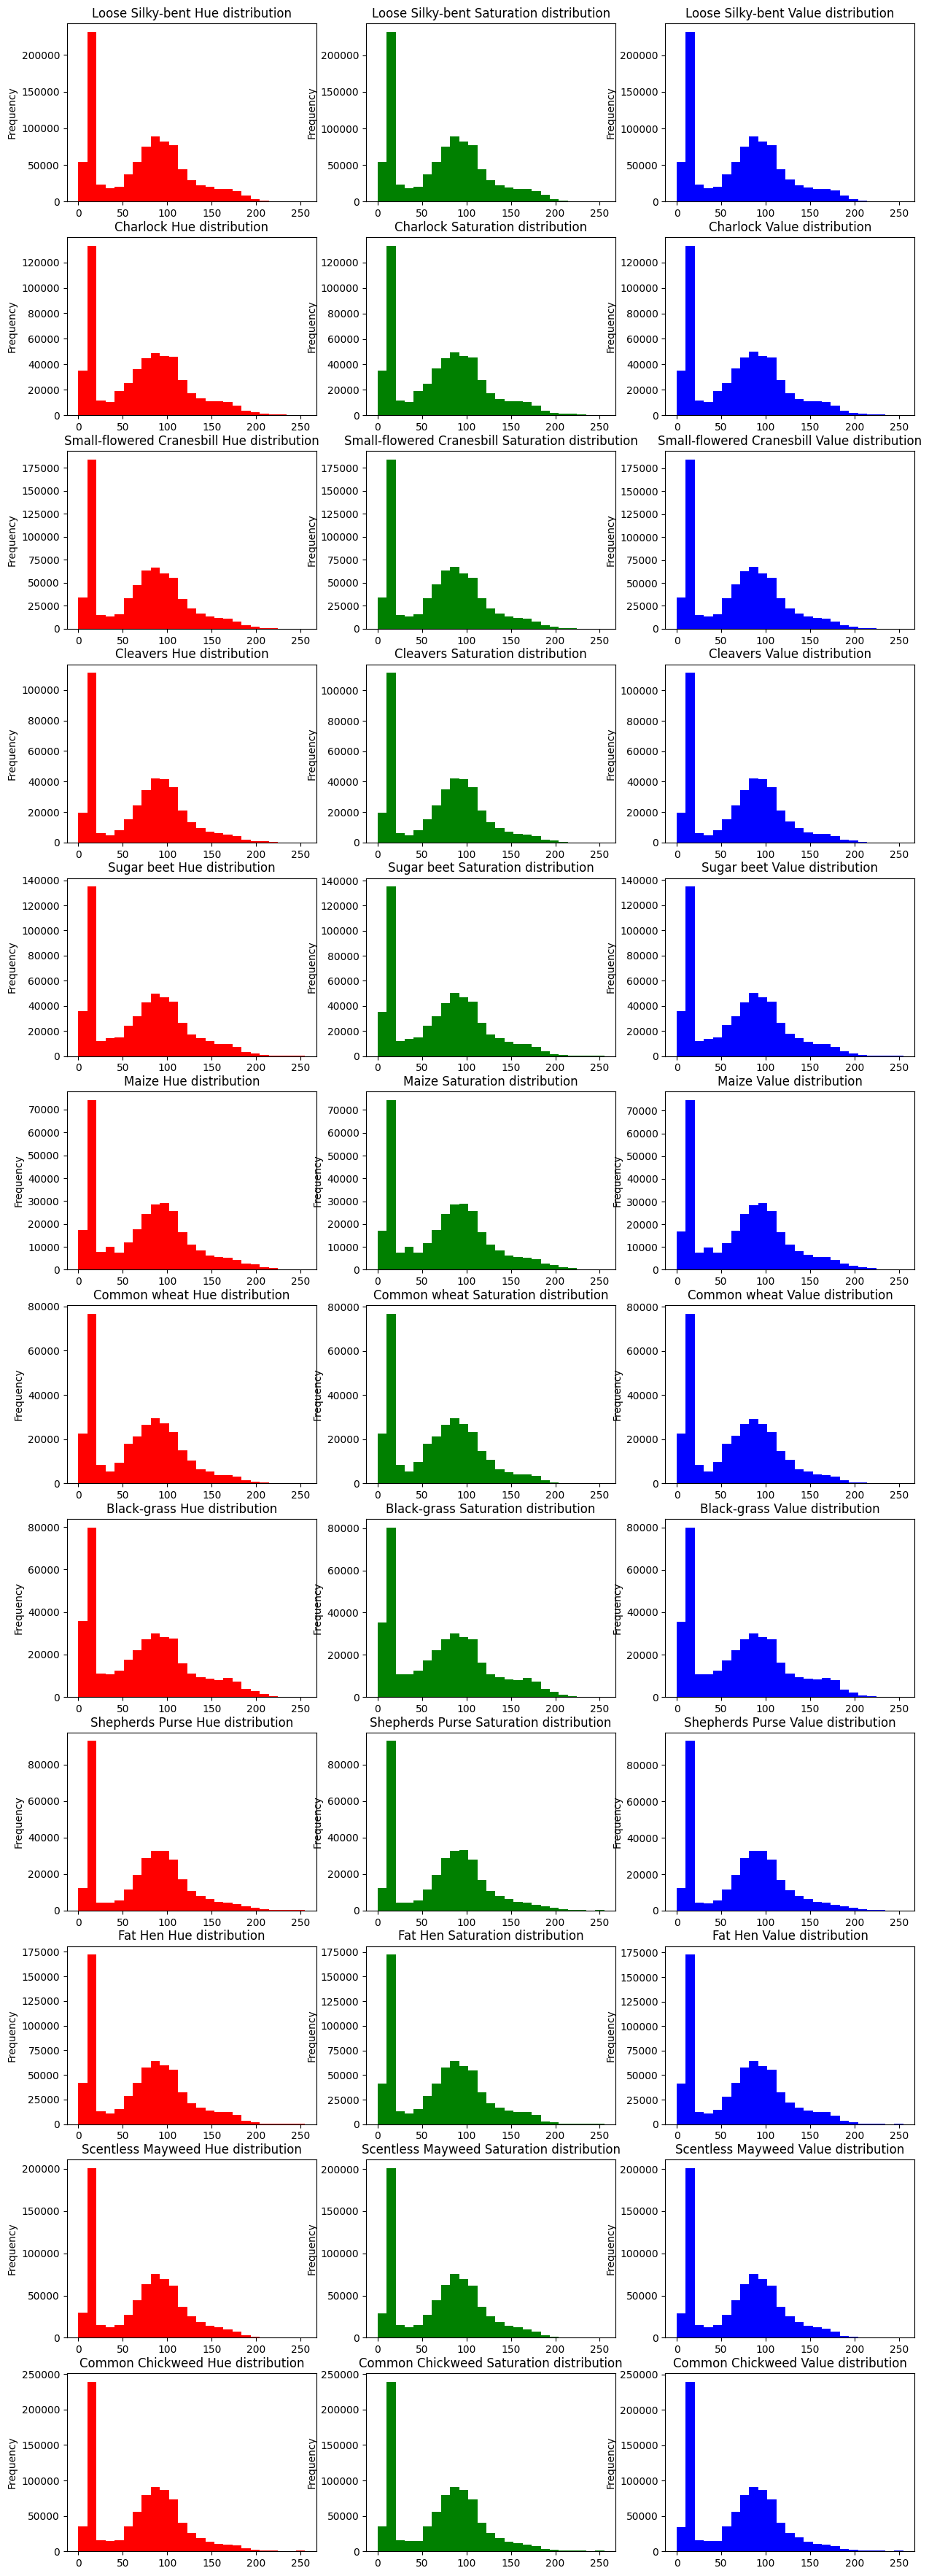

In [13]:
fig, axs = plt.subplots(12, 3, figsize=(15,45))
for c, (k,v) in enumerate(pic_xs.items()):
    pd.Series(np.array(pic_xhsv[k])[:, :, 0].flatten()).plot(kind='hist',
                                                  bins=25, title=f'{k} Hue distribution', ax=axs[c, 0], color='red')
    pd.Series(np.array(pic_xhsv[k])[:, :, 1].flatten()).plot(kind='hist',
                                                  bins=25, title=f'{k} Saturation distribution', ax=axs[c, 1], color='green')
    pd.Series(np.array(pic_xhsv[k])[:, :, 2].flatten()).plot(kind='hist',
                                                  bins=25, title=f'{k} Value distribution', ax=axs[c, 2], color='blue')

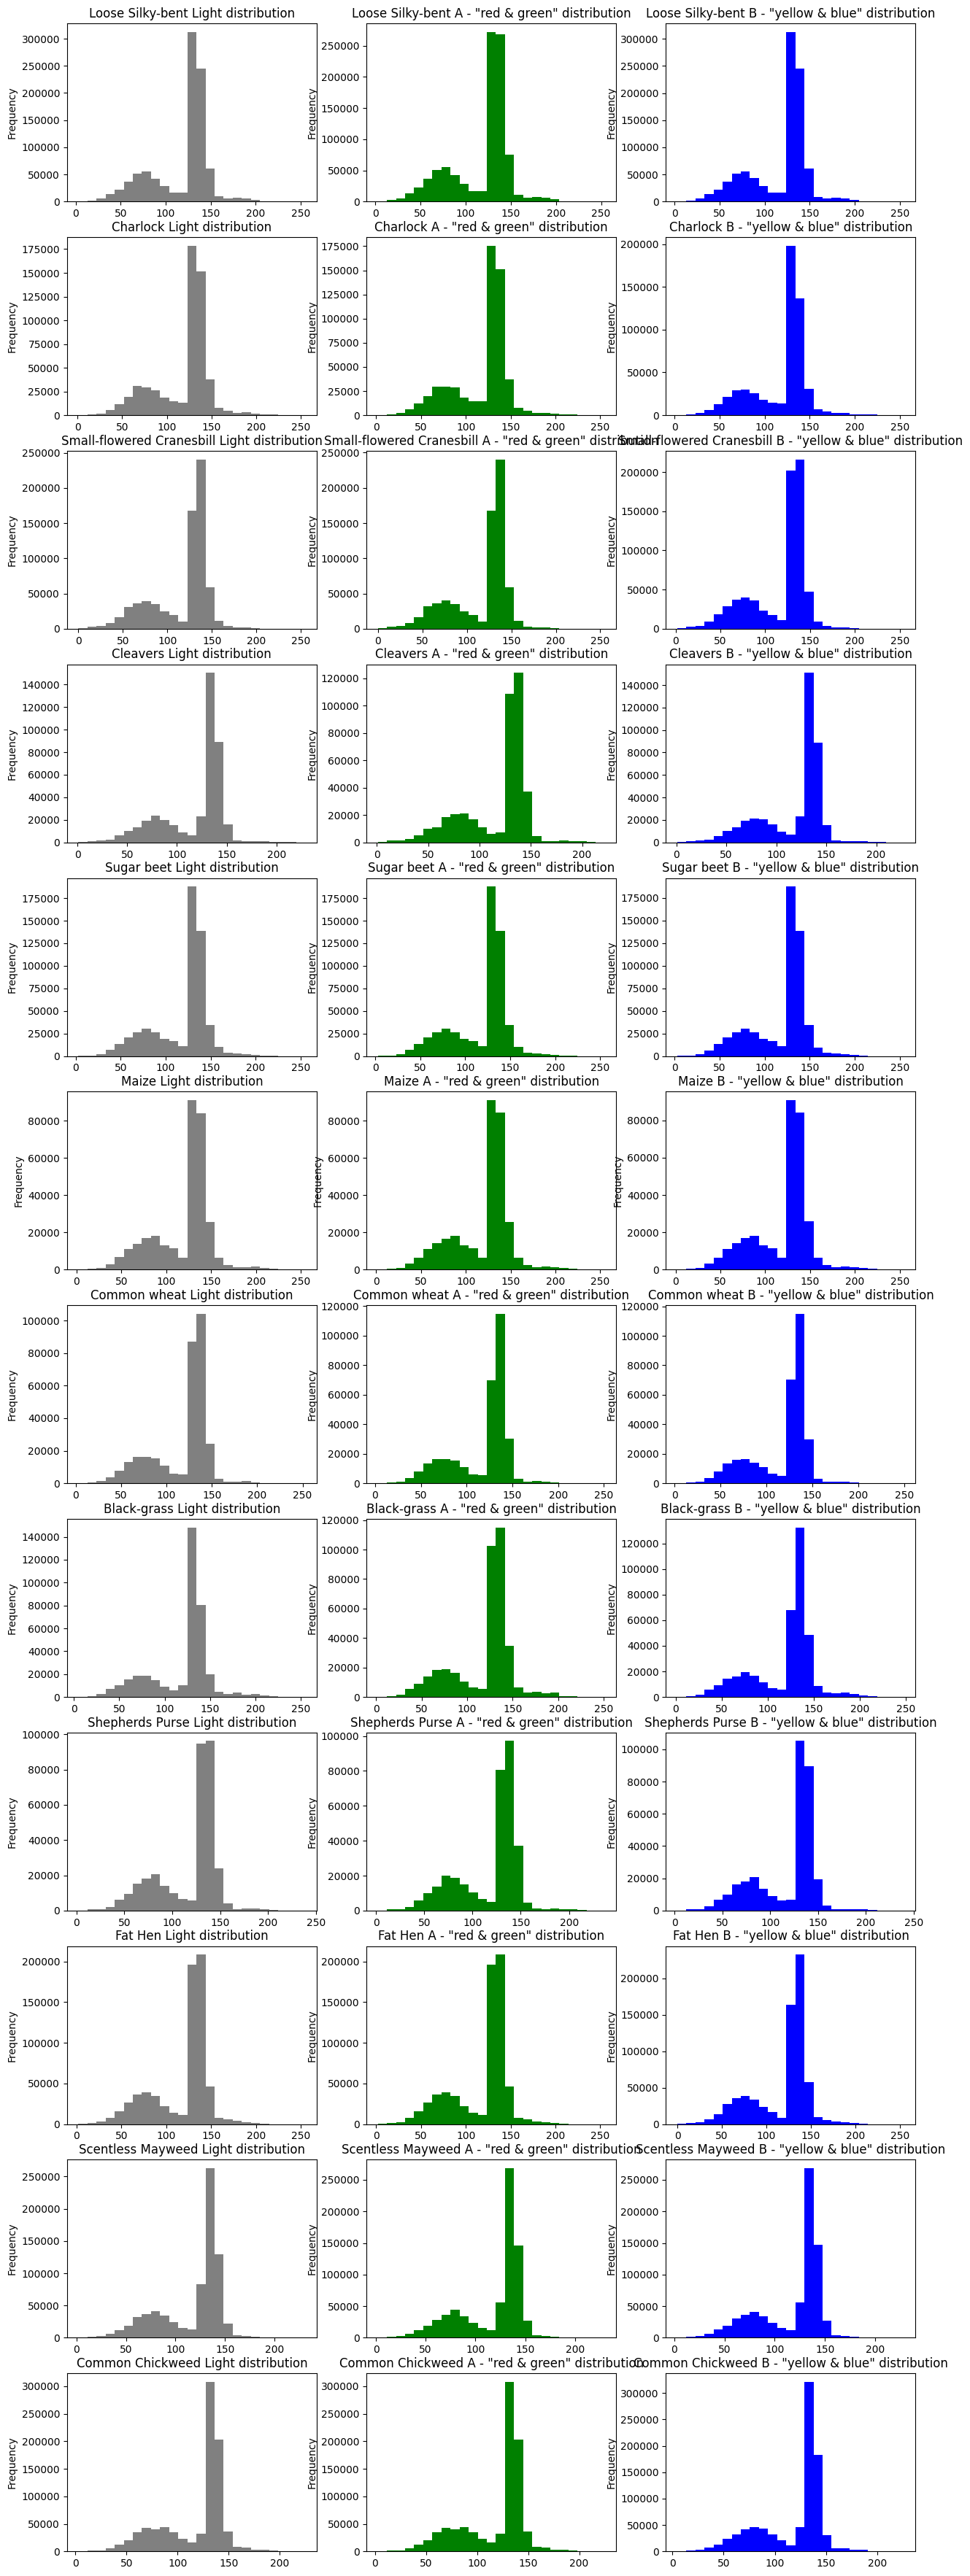

In [205]:
fig, axs = plt.subplots(12, 3, figsize=(15,45))
for c, (k,v) in enumerate(pic_xlab.items()):
    pd.Series(np.array(pic_xlab[k])[:, :, 0].flatten()).plot(kind='hist',
                                                  bins=25, title=f'{k} Light distribution', ax=axs[c, 0], color='grey')
    pd.Series(np.array(pic_xlab[k])[:, :, 1].flatten()).plot(kind='hist',
                                                  bins=25, title=f'{k} A - "red & green" distribution', ax=axs[c, 1], color='green')
    pd.Series(np.array(pic_xlab[k])[:, :, 2].flatten()).plot(kind='hist',
                                                  bins=25, title=f'{k} B - "yellow & blue" distribution', ax=axs[c, 2], color='blue')

In [8]:
shape_lst = [i.shape for i in pic_x]

In [9]:
max(shape_lst), min(shape_lst)

((3457, 3991, 3), (49, 49, 3))

In [66]:
pd.Series(shape_lst)#.sort_values().head(15)

0       (167, 167, 3)
1       (499, 499, 3)
2       (155, 155, 3)
3       (139, 139, 3)
4         (83, 83, 3)
            ...      
4745    (170, 170, 3)
4746      (98, 98, 3)
4747      (99, 99, 3)
4748    (183, 183, 3)
4749    (104, 104, 3)
Length: 4750, dtype: object

In [21]:
pd.Series(shape_lst).sort_values().tail(15)

614     (1942, 1943, 3)
65      (2030, 2030, 3)
103     (2030, 2030, 3)
2710    (2086, 2087, 3)
365     (2088, 2218, 3)
354     (2088, 2218, 3)
2786    (2132, 2840, 3)
2865    (2192, 2835, 3)
2754    (2266, 2267, 3)
2654    (2474, 2474, 3)
2835    (2511, 2512, 3)
2683    (2670, 2670, 3)
591     (3129, 3129, 3)
343     (3457, 3652, 3)
268     (3457, 3991, 3)
dtype: object